In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [2]:
resultados_modelos = pd.read_csv('data/resultados_dos_modelos_aluguel.csv')
resultados_rn = pd.read_csv('data/resultados_da_rn_aluguel.csv').drop(columns=['index']).replace('R2', 'R²')

In [23]:
resultados_rn[(resultados_rn["Valor"] > 0.78) & (resultados_rn["Valor"] < 0.79)]

,Algoritmo,Métrica,Valor
721,RedeNeural,R²,0.781891


In [31]:
display(resultados_rn.loc[235])
display(resultados_rn.loc[243+235])
display(resultados_rn.loc[243+243+235])
display(resultados_rn.loc[243+243+243+235])

Algoritmo     RedeNeural
Métrica              MAE
Valor        1426.440884
Name: 235, dtype: object

Algoritmo     RedeNeural
Métrica             RMSE
Valor        2448.748639
Name: 478, dtype: object

Algoritmo    RedeNeural
Métrica              R²
Valor          0.781891
Name: 721, dtype: object

Algoritmo    RedeNeural
Métrica            MAPE
Valor        150.630494
Name: 964, dtype: object

In [25]:
resultados_rn.groupby("Métrica").count()

,Algoritmo,Valor
Métrica,,
MAE,243,243
MAPE,243,243
RMSE,243,243
R²,243,243


In [27]:
721 - (243+243)

235

In [29]:
resultados_modelos.loc[resultados_modelos["Métrica"].isin(["MAE", "RMSE", "MAPE"]), "Valor"] = resultados_modelos[resultados_modelos["Métrica"].isin(["MAE", "RMSE", "MAPE"])]["Valor"] * -1

In [30]:
resultados_rn.loc[resultados_rn["Métrica"] == "MAPE", "Valor"] = resultados_rn[resultados_rn["Métrica"] == "MAPE"]["Valor"] / 100

In [31]:
print(resultados_rn["Métrica"].unique())
print(resultados_modelos["Métrica"].unique())

['MAE' 'RMSE' 'R²' 'MAPE']
['MAE' 'RMSE' 'R²' 'MAPE']


In [36]:
resultados_totais = pd.concat([resultados_modelos, resultados_rn])
resultados_totais

,Métrica,Valor,Algoritmo
0,MAE,1777.813181,Ridge
1,MAE,1777.198873,Ridge
2,MAE,1771.162057,Ridge
3,MAE,1728.559083,Ridge
4,MAE,1707.082274,Ridge
...,...,...,...
967,MAPE,0.573361,RedeNeural
968,MAPE,0.573428,RedeNeural
969,MAPE,0.657522,RedeNeural
970,MAPE,0.690661,RedeNeural


C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\FVF0\AppData\Local\Temp\ipykernel_3372\3792620720.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

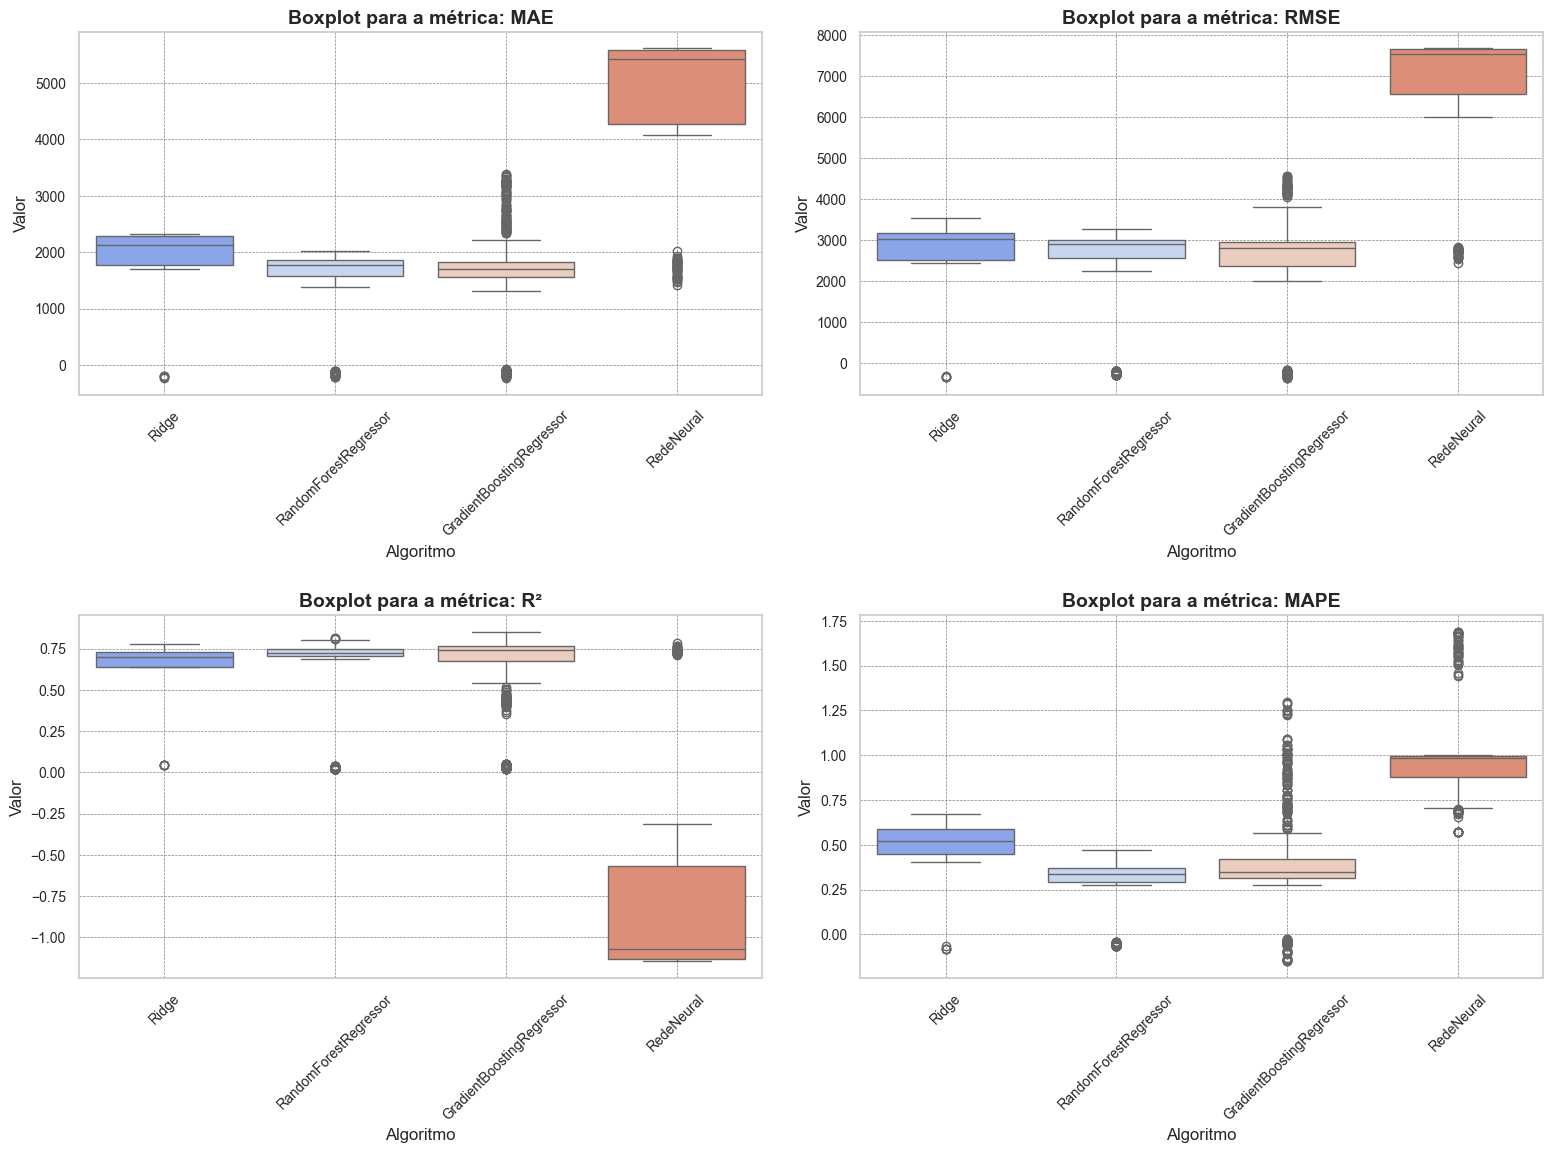

In [33]:
# Ajustar o estilo dos plots
sns.set_theme(style="whitegrid", palette="pastel")

# Obter as métricas únicas
metricas = resultados_totais['Métrica'].unique()

# Determinar o número de linhas e colunas
ncols = 2
nrows = math.ceil(len(metricas) / ncols)  # Calcula o número de linhas necessário

# Criar uma grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6 * nrows))
axes = axes.flatten()  # Achatar o array de eixos para facilitar o loop

# Criar um boxplot para cada métrica
for i, metrica in enumerate(metricas):
    sns.boxplot(
        data=resultados_totais[resultados_totais['Métrica'] == metrica],
        x='Algoritmo',
        y='Valor',
        ax=axes[i],
        palette="coolwarm"  # Paleta de cores
    )
    axes[i].set_title(f"Boxplot para a métrica: {metrica}", fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid(color='gray', linestyle='--', linewidth=0.5)

# Remover eixos extras, caso existam
for j in range(len(metricas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout(pad=2.0)

# Exibir o gráfico
plt.show()

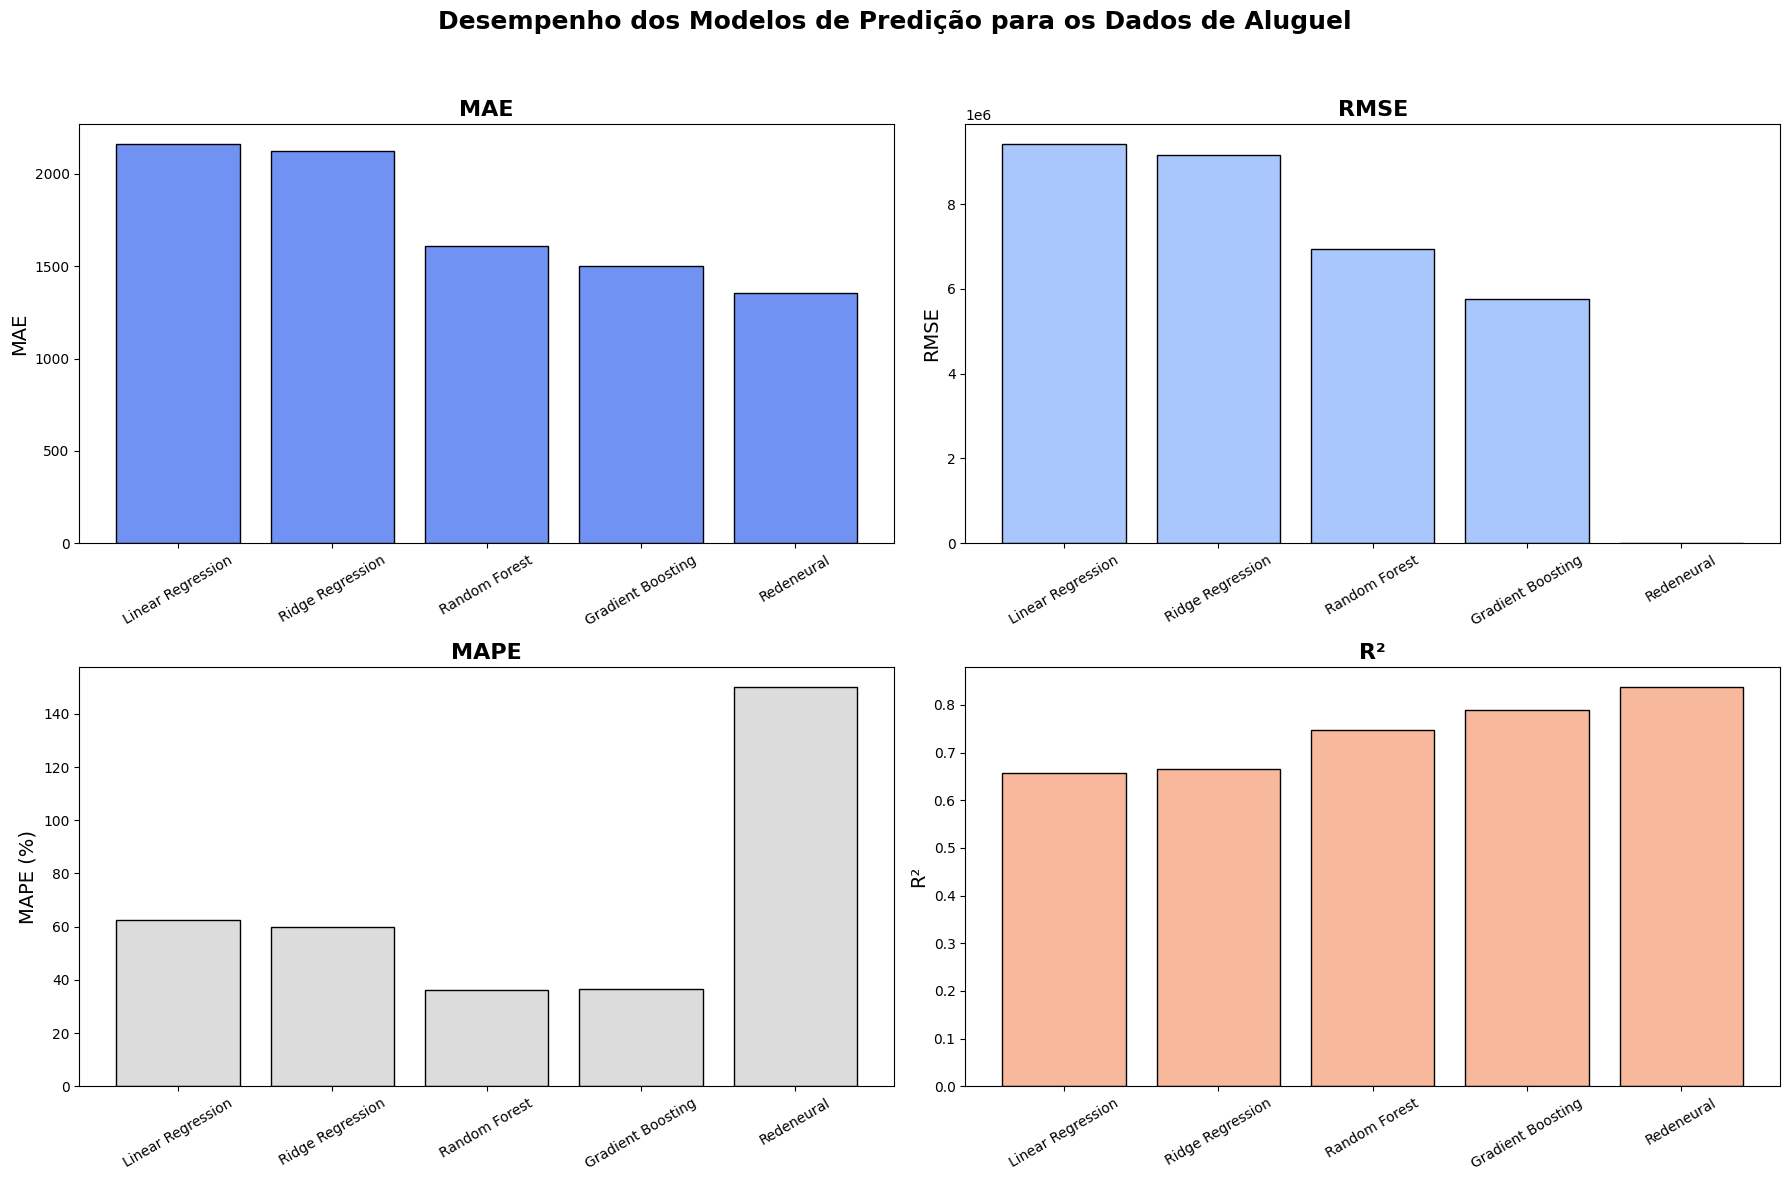

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados para Aluguel
aluguel_modelos = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Gradient Boosting', 'Redeneural']
aluguel_mae = [2159.4244, 2122.3243, 1607.9316, 1498.3221, 1354.7818]
aluguel_rmse = [9410711.8776, 9167434.7934, 6942425.2192, 5770241.4008, 2117.7866]
aluguel_mape = [62.3250, 59.8624, 36.0322, 36.4064, 150]  # Redeneural não possui MAPE
aluguel_r2 = [0.6577, 0.6665, 0.7475, 0.7901, 0.8369]

# Criando a figura maior
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Paleta "coolwarm" do Seaborn
paleta = sns.color_palette("coolwarm", 5)

# Título principal
fig.suptitle("Desempenho dos Modelos de Predição para os Dados de Aluguel", fontsize=18, fontweight='bold')

# MAE
axs[0, 0].bar(aluguel_modelos, aluguel_mae, color=paleta[0], edgecolor='black')
axs[0, 0].set_title('MAE', fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel('MAE', fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=30)

# RMSE
axs[0, 1].bar(aluguel_modelos, aluguel_rmse, color=paleta[1], edgecolor='black')
axs[0, 1].set_title('RMSE', fontsize=16, fontweight='bold')
axs[0, 1].set_ylabel('RMSE', fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=30)

# MAPE
axs[1, 0].bar(aluguel_modelos, aluguel_mape, color=paleta[2], edgecolor='black')  # Excluindo Redeneural
axs[1, 0].set_title('MAPE', fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel('MAPE (%)', fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=30)

# R²
axs[1, 1].bar(aluguel_modelos, aluguel_r2, color=paleta[3], edgecolor='black')
axs[1, 1].set_title('R²', fontsize=16, fontweight='bold')
axs[1, 1].set_ylabel('R²', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=30)

# Ajustando espaçamentos
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Ajustando layout para evitar cortes
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Exibindo o gráfico
plt.show()
